# COGS 108 - Final Project - Analysis of Popular Music Through Billboard Mainstays

# Overview

*TODO*

# Names

- Caroline Sih
- Kelly Lo
- Chuyue Zhang
- Emma Leng
- Abigail Sigler

# Group Members IDs

- A14491488
- A15435725
- A14803791
- A########
- A14462479

# Research Question

*What are the common qualities of songs that make the Billboard Top 100 for more than one year, and do these qualities change over time?*

## Background and Prior Work

*Music has always been a major part of American society, and songs often reflect current events and cultural sentiment that is present in society at the time of their creation. Although most songs that experience popularity retain it only for a short period of time, some songs have stayed culturally relevant and popular over longer periods of time, and even decades.* 

*One of the most widely accepted measurements of musical popularity is the Billboard Top 100 chart, which releases a ranking of the best-performing songs in the United States each week. Each year, these consecutive rankings are combined to create a Top 100 chart for the entire year, which is a fair estimate of song popularity and their relevance in society for that period of time*

*Because music can be a response to current events and plays an important role in American society, the popularity of songs during a given year--and thus their presence on the Billboard Top 100--can be established to reflect their relevance in American culture. The common factors within these songs that persist in cultural relevance over time can be examined as an insight into American society.* 

References (include links):
- 1) https://data.world/kcmillersean/billboard-hot-100-1958-2017?fbclid=IwAR1P5o2E5IO19nJJSB5PjouSlIoIqRuPT0sDCZQrDqrj3XNm65LF-pRQNKA

- 2) https://spotipy.readthedocs.io/en/latest/

# Hypothesis


*We expect to see an increasing trend of globalization and diversity of gender and race of popular artists as time goes on, but a more explicit divide between incredibly popular, viral songs thanks to the advent of social media.*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as pltcm
import seaborn as sns

# Configure libraries
sns.set()

# Round decimals when displaying DataFrames
pd.set_option('precision', 4)

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
# load dataset
billboardWeekly = pd.read_csv('billboardHotWeekly.csv')

In [3]:
# create a new dictionary and store the max number of weeks on chart for each song/instance
dictSortIndex = {}
# number of songs that have been #1 on the list
peakList = []
# a list of all the song names
songNames = []

for row in billboardWeekly.itertuples():
    # save to peak1 list
    if row.PeakPosition == 1:
        if not (row.SongID in peakList):
            peakList.append(row.SongID)
    # max weeks_on_chart
    if row.SongID in dictSortIndex.keys():
        if row.Instance in ((dictSortIndex[row.SongID]).keys()):
            if (dictSortIndex[row.SongID])[row.Instance] < row.WeeksOnChart:
                (dictSortIndex[row.SongID])[row.Instance] = row.WeeksOnChart
        else:
            (dictSortIndex[row.SongID])[row.Instance] = row.WeeksOnChart
    else:
        songNames.append(row.Song)
        dictSortIndex[row.SongID] = {}
        (dictSortIndex[row.SongID])[row.Instance] = row.WeeksOnChart

In [4]:
# list of songs that have been popular for more than a year        
popularSongs = []
for pair1 in dictSortIndex:
    tempSum = 0
    for pair2 in dictSortIndex[pair1]:
        tempSum = tempSum + dictSortIndex[pair1][pair2]
    if tempSum >= 51:
        popularSongs.append(pair1)
        
# percentage of songs that have been popular for more than a year vs. total songs
popularMoreThan1Yr = ((len(popularSongs))/(len(dictSortIndex.keys())))

# songs that have been #1 & were popular for more than a year
superPopular = []
for song in peakList:
    if song in popularSongs:
        superPopular.append(song)

In [5]:
# This is for songs that have reached the #1 on the chart
numOne = {}
for key in peakList:
    yr = billboardWeekly[billboardWeekly.SongID == key].WeekID.iloc[0].split('/')[2]
    if(yr in numOne.keys()):
        numOne[yr] += 1
    else:
        numOne[yr] = 1

In [6]:
# 1: number of songs with more than one instance on the charts
yearToInstance = {}
for key, value in dictSortIndex.items():
    if len(value.keys()) > 1:
        yr = billboardWeekly[billboardWeekly.SongID == key].WeekID.iloc[0].split('/')[2]
        if(yr in yearToInstance.keys()):
            yearToInstance[yr] += 1
        else:
            yearToInstance[yr] = 1

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

    Year  Songs
3   1958      8
39  1959     17
58  1960     20
57  1961     19
40  1962     19
..   ...    ...
28  2015      8
11  2016     10
12  2017     10
13  2018     13
14  2019      3

[62 rows x 2 columns]


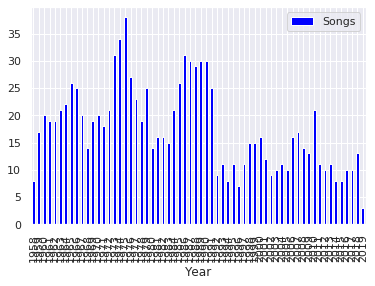

In [7]:
# histogram to map year against number of songs reaching number 1
data = {'Year': list(numOne.keys()), 'Songs': list(numOne.values())}
numOneDF = pd.DataFrame(data)
numOneDF = numOneDF.sort_values("Year")
print(numOneDF)
numOneDF.plot(kind='bar', x= 'Year', y='Songs', color='blue')
plt.savefig('YEARSx#SONGSREACHINGNUM1')
plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


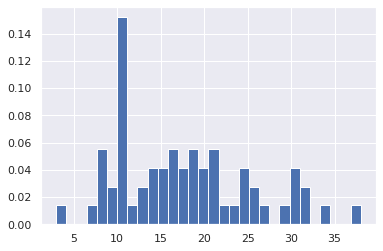

38

In [8]:
x = numOneDF['Songs']
plt.hist(x, normed=True, bins=30)
plt.savefig('YEARSx#SONGSREACHINGNUM1HIST')
plt.show()
x.max()

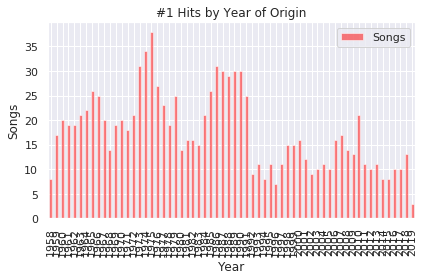

In [9]:
numOneDF.plot(kind='bar', x= 'Year', y='Songs', color='red', alpha=0.5)
plt.savefig('YEARSx#SONGSREACHINGNUM1')
plt.ylabel('Songs')
plt.title('#1 Hits by Year of Origin')
plt.tight_layout()
plt.show()

In [11]:
* This data illustrates the relationship between the number of songs reaching the #1 spot on the Billboard Weekly Top 100 at least once, and the songs' years of origin. Interestingly, this data is relatively bell-shaped, with a peak in 1975 of over 35 songs that would at different points in time appear on the Billboard Top 100 Charts in the #1 spot. Additionally, there is a trend of this number sharply decreasing over time; in 2016, there were less than 10 songs that made it to #1 on the charts.*

* are many factors that could create this phenomenon, one of which issimply the increasing divide between "viralness" and "popularity" as opposed to normality. As social media has influenced what consumers can see, viral trends such as Lil Nas X's "Old Town Road" have jumped into popularity--and stayed there, in the #1 spot, for weeks on end. Because these extremely popular songs remain in the spot for so long, despite the increasing globalization and diversity of the music industry, most songs will never make it into that spot of #1 because it is taken by long-lasting songs.*

SyntaxError: invalid syntax (<ipython-input-11-78713d5bcf4c>, line 1)

In [ ]:
data = {'Year': list(yearToInstance.keys()), 'Songs': list(yearToInstance.values())}
yearInstanceDF = pd.DataFrame(data)
yearInstanceDF = yearInstanceDF.sort_values("Year")
print(yearInstanceDF)
yearInstanceDF.plot(kind='bar', x= 'Year', y='Songs', color='blue')
plt.savefig('YEARSxMUL_INSTANCES')
#pltcm.register_cmap(name='swirly', cmap=swirly_cmap)
plt.show()

In [ ]:
This data illustrates the mapping of each year (on the x axis) to the number of songs with more than one instance of appearing on the Billboard Weekly Top 100. Songs that are extremely popular by this metric are therefore becoming increasingly more common as time goes on, as demonstrated by the sharp rise since the mid-1970s (in which appeared very few songs with more than one instance).

Another factor at play here is the resurgence of many songs, as mainstream fascination with past culture has seen a heighted presence in recent years. For instance, popular songs by ABBA and The Beatles have had resurgences in recent years, demonstrating the enduring nature of music and artists who have remained relevant to the public eye.

An additional factor in recurring songs is that holiday songs, such as Christmas or Halloween songs, have a sharp seasonal ebb and flow that would lend themselves toward higher representation on these lists. Because they regain spots on the list seasonally, they would be more highly represented here than a song that is extremely popular but fades in popularity eventually without resurgence.

Factors to explore in the future include the high density of songs that have seen resurgences peaking in the early 1960s.

In [5]:
# Spotify API setup
import spotipy
import requests
import json

from spotipy.oauth2 import SpotifyClientCredentials
# Set up credentials
client_credentials_manager = SpotifyClientCredentials('84b5738225894c76aecf0578c6ff2862', '89d0aeb4ee7c4841b5800cd068ee3f69')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)
songURLs = {}

totalDanc = 0
for names in songNames:
    count = 0
    if (len(sp.search(names)['tracks']['items'])) > 0:
        temp = (sp.search("Despacito")['tracks']['items'][0]['uri'])
        danc = (sp.audio_features(temp)[0]['danceability'])
        songURLs[names] = danc
        totalDanc = totalDanc + danc

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*